In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
#lets import the data set
import pandas as pd
df_loan=pd.read_csv("train_loanPrediction.csv")
df_loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
#Lets chcek the null values 
for col in df_loan.columns:
    print("Column data type :",df_loan[col].dtype," column name :",col," Null values: ",df_loan[col].isnull().sum())
#Below o/p shows presense of null values in each column   

Column data type : object  column name : Loan_ID  Null values:  0
Column data type : object  column name : Gender  Null values:  13
Column data type : object  column name : Married  Null values:  3
Column data type : object  column name : Dependents  Null values:  15
Column data type : object  column name : Education  Null values:  0
Column data type : object  column name : Self_Employed  Null values:  32
Column data type : int64  column name : ApplicantIncome  Null values:  0
Column data type : float64  column name : CoapplicantIncome  Null values:  0
Column data type : float64  column name : LoanAmount  Null values:  22
Column data type : float64  column name : Loan_Amount_Term  Null values:  14
Column data type : float64  column name : Credit_History  Null values:  50
Column data type : object  column name : Property_Area  Null values:  0
Column data type : object  column name : Loan_Status  Null values:  0


In [5]:
#Lets check the corrrelation matrix
df_loan.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


In [6]:
#Lets describe the dataset
df_loan.describe()
#there is difference between mean value and median so there can outliers present in the data set

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


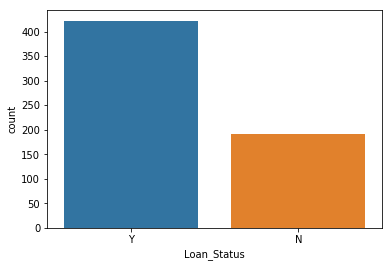

In [7]:
#Lets chcek the count of each type of class in loan status 
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x="Loan_Status",data=df_loan)
plt.show()
#imbalanced dataset problem so we can use SMOTE just to increase instances of minority classes in training dataset

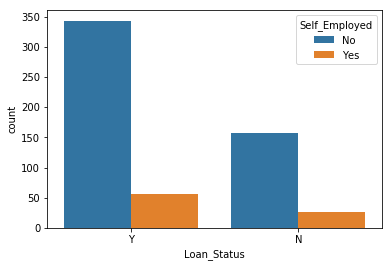

In [8]:
#lets check the count of loan status considering "Self_Employed"
sns.countplot(x="Loan_Status",hue="Self_Employed",data=df_loan)
plt.show()

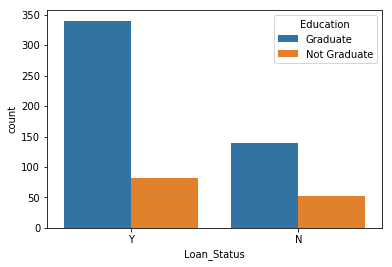

In [9]:
#Lets check the count based on "Education"
sns.countplot(x="Loan_Status",hue="Education",data=df_loan)
plt.show()
#people who are graduated has tendency of getting loans than who are not

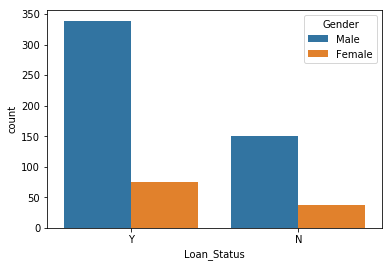

In [10]:
#lets chcek loan status based on gender
sns.countplot(x="Loan_Status",hue="Gender",data=df_loan)
plt.show()
#there are more number of males applying fro the loans comapred to female

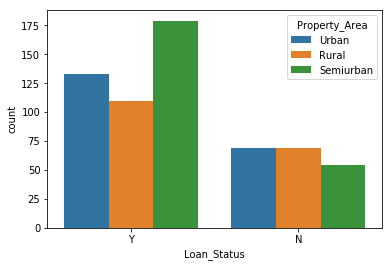

In [11]:
#lets chcek the loan status based on property area
sns.countplot(x="Loan_Status",hue="Property_Area",data=df_loan)
plt.show()

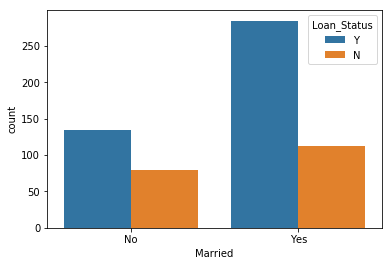

In [12]:
#Lets chcek the count based on marital status
sns.countplot(x="Married",hue="Loan_Status",data=df_loan)
plt.show()
#ration of people geting loans to not getting loans when they are married is high

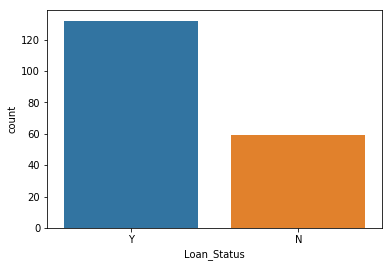

In [13]:
#Lets chcek loan status for applicant income greater than 5000
sns.countplot(x="Loan_Status",data=df_loan.loc[df_loan["ApplicantIncome"]>5000])
plt.show()
#people whose loan was sanctioned are more than double of prople whose loan was not sanctioned

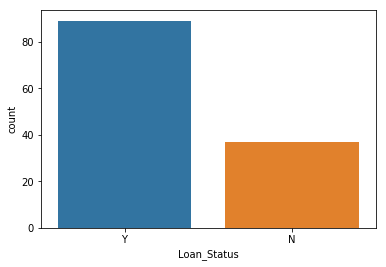

In [14]:
#Lets chcek what is the effect on above count if co-aplicant income is 0
sns.countplot(x="Loan_Status",data=df_loan.loc[(df_loan["ApplicantIncome"]>5000)&(df_loan["CoapplicantIncome"]==0)])
plt.show()
#count reduced but still ratio is almost same

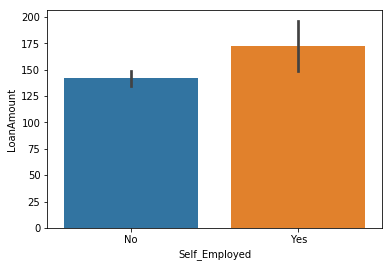

In [15]:
#lets compare the average loan amount between self employed and not self employed
sns.barplot(y="LoanAmount",x="Self_Employed",data=df_loan)
plt.show()
#avaerge loan amount demanded by the self employed is more but there is not too much difference

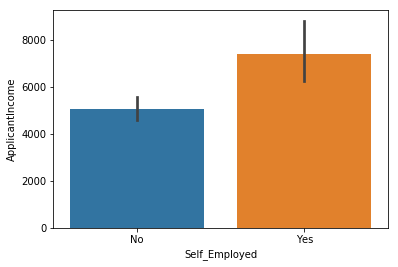

In [16]:
#Lets compare the average income of employed and self employed
sns.barplot(y="ApplicantIncome",x="Self_Employed",data=df_loan)
plt.show()
#Average income is also

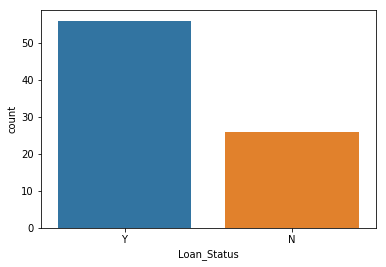

In [17]:
#Lets compare the count of people who got loans and who didn't
sns.countplot(x="Loan_Status",data=df_loan.loc[df_loan["Self_Employed"]=="Yes"])
plt.show()
#there are more than double who got loan
#next step is to compare the average income of people who got loan and who didn't ,given they are self employed

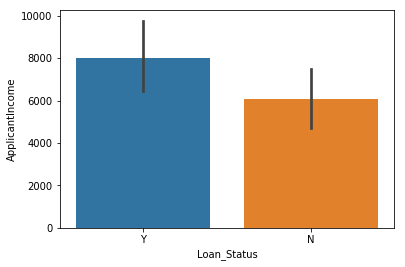

In [18]:
sns.barplot(y="ApplicantIncome",x="Loan_Status",data=df_loan.loc[df_loan["Self_Employed"]=="Yes"])
plt.show()
#So people who got loan has averge income more and it is expected

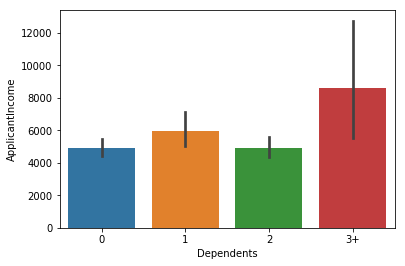

In [19]:
# let's chcek the average loan amount as per Dependents
sns.barplot(y="ApplicantIncome",x="Dependents",data=df_loan)
plt.show()
#Average income of dependents of with 2 is less than with 1

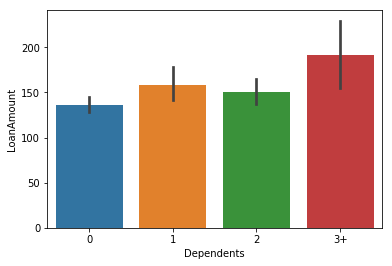

In [20]:
#lets chcek the average loan amount requested
sns.barplot(y="LoanAmount",x="Dependents",data=df_loan)
plt.show()
#Averge loan amount by person with dependents more 3 is highest

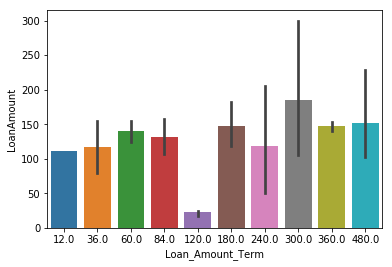

In [21]:
#Average loan amount requested groupped by Loan_Amount_Term
sns.barplot(x="Loan_Amount_Term",y="LoanAmount",data=df_loan)

In [22]:
#we have seen there are null values  
for col in df_loan.columns:
    print("Column data type :",df_loan[col].dtype," column name :",col," Null values: ",df_loan[col].isnull().sum())

Column data type : object  column name : Loan_ID  Null values:  0
Column data type : object  column name : Gender  Null values:  13
Column data type : object  column name : Married  Null values:  3
Column data type : object  column name : Dependents  Null values:  15
Column data type : object  column name : Education  Null values:  0
Column data type : object  column name : Self_Employed  Null values:  32
Column data type : int64  column name : ApplicantIncome  Null values:  0
Column data type : float64  column name : CoapplicantIncome  Null values:  0
Column data type : float64  column name : LoanAmount  Null values:  22
Column data type : float64  column name : Loan_Amount_Term  Null values:  14
Column data type : float64  column name : Credit_History  Null values:  50
Column data type : object  column name : Property_Area  Null values:  0
Column data type : object  column name : Loan_Status  Null values:  0


In [23]:
#lets impute the object datatype columns by mode groupped by same target class
for col in df_loan.columns:
    if df_loan[col].dtype=="object" and df_loan[col].isnull().sum()>0:
        df_loan.loc[df_loan["Loan_Status"]=="Y",[col]]=df_loan.loc[df_loan["Loan_Status"]=="Y",[col]].fillna(df_loan.loc[df_loan["Loan_Status"]=="Y",[col]].mode().iloc[0])
        df_loan.loc[df_loan["Loan_Status"]=="N",[col]]=df_loan.loc[df_loan["Loan_Status"]=="N",[col]].fillna(df_loan.loc[df_loan["Loan_Status"]=="N",[col]].mode().iloc[0])

In [159]:
#Lets again chcek the null values
df_loan.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [24]:
#Loan amount can be imputed by mean grouped by classes
df_loan.loc[df_loan["Loan_Status"]=="Y",["LoanAmount"]]=df_loan.loc[df_loan["Loan_Status"]=="Y",["LoanAmount"]].fillna(df_loan.loc[df_loan["Loan_Status"]=="Y",["LoanAmount"]].mean())
df_loan.loc[df_loan["Loan_Status"]=="N",["LoanAmount"]]=df_loan.loc[df_loan["Loan_Status"]=="N",["LoanAmount"]].fillna(df_loan.loc[df_loan["Loan_Status"]=="N",["LoanAmount"]].mean())

In [161]:
#lets chcek Null values again
df_loan.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [25]:
#Lets impute rest of the columns with mode as they seem to be of categorical type
for col in df_loan.columns:
    if df_loan[col].isnull().sum()>0:
        df_loan.loc[df_loan["Loan_Status"]=="Y",[col]]=df_loan.loc[df_loan["Loan_Status"]=="Y",[col]].fillna(df_loan.loc[df_loan["Loan_Status"]=="Y",[col]].mode().iloc[0])
        df_loan.loc[df_loan["Loan_Status"]=="N",[col]]=df_loan.loc[df_loan["Loan_Status"]=="N",[col]].fillna(df_loan.loc[df_loan["Loan_Status"]=="N",[col]].mode().iloc[0])

In [165]:
#lets again check null values
df_loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [26]:
#lets check the skewness of the dataset
df_loan.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.724592
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
dtype: float64

In [27]:
#dividing it into input and output
df_x=df_loan.drop(columns=["Loan_Status"])
y=df_loan[["Loan_Status"]]

In [28]:
import numpy as np
for index in df_x.skew().index:
    if df_x.skew().loc[index]>0.5:
        df_x[index]=np.log1p(df_x[index])

In [29]:
#lets chcek the skewness
df_x.skew()

ApplicantIncome      0.482128
CoapplicantIncome   -0.173073
LoanAmount          -0.181343
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
dtype: float64

In [30]:
#Lets chcek the datatypes in input dataset
df_x.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [31]:
#we can delete loan id as it has no significance in prediction
df_x.drop(columns=["Loan_ID"],inplace=True)

In [32]:
df_x=pd.get_dummies(df_x,drop_first=True)

In [33]:
#Lets chcek the shape
df_x.shape

(614, 14)

In [34]:
#lets bring all features to a common scale using
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(df_x)
x=sc.transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [176]:
#lets use labelencoder to convert target class into integers
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(y)
y=le.transform(y)
y

F:\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [209]:
#since it is imbalanced dataset so we will focus on auc-roc score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
def max_aucroc_score(clf,df_x,y):
    max_aucroc_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(df_x, y,random_state = r_state,test_size=0.20,stratify=y)
        x_train, y_train = SMOTE().fit_sample(x_train, y_train)
        clf.fit(x_train,y_train)
        y_pred = clf.predict(x_test)
        aucroc_scr=roc_auc_score(y_test,y_pred)
        print("auc roc score corresponding to ",r_state," is ",aucroc_scr)
        if aucroc_scr>max_aucroc_score:
            max_aucroc_score=aucroc_scr
            final_r_state=r_state
    print("max auc roc score corresponding to ",final_r_state," is ",max_aucroc_score)
    return final_r_state

In [210]:
#Lets use logistic regression and check
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")
lg_clf=LogisticRegression()
max_aucroc_score(lg_clf,x,y)

auc roc score corresponding to  42  is  0.7905572755417957
auc roc score corresponding to  43  is  0.6880804953560371
auc roc score corresponding to  44  is  0.698452012383901
auc roc score corresponding to  45  is  0.6866873065015481
auc roc score corresponding to  46  is  0.7116099071207429
auc roc score corresponding to  47  is  0.6617647058823529
auc roc score corresponding to  48  is  0.6603715170278638
auc roc score corresponding to  49  is  0.7185758513931888
auc roc score corresponding to  50  is  0.6835913312693498
auc roc score corresponding to  51  is  0.6835913312693498
auc roc score corresponding to  52  is  0.6922600619195046
auc roc score corresponding to  53  is  0.6558823529411765
auc roc score corresponding to  54  is  0.6794117647058824
auc roc score corresponding to  55  is  0.7320433436532507
auc roc score corresponding to  56  is  0.6004643962848297
auc roc score corresponding to  57  is  0.6839009287925697
auc roc score corresponding to  58  is  0.651702786377709

42

In [211]:
#lets chcek decision tree
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
max_aucroc_score(dc,df_x,y)

auc roc score corresponding to  42  is  0.7493808049535603
auc roc score corresponding to  43  is  0.6572755417956657
auc roc score corresponding to  44  is  0.6410216718266253
auc roc score corresponding to  45  is  0.7026315789473685
auc roc score corresponding to  46  is  0.6455108359133127
auc roc score corresponding to  47  is  0.613312693498452
auc roc score corresponding to  48  is  0.6558823529411765
auc roc score corresponding to  49  is  0.7154798761609907
auc roc score corresponding to  50  is  0.7099071207430339
auc roc score corresponding to  51  is  0.6645510835913312
auc roc score corresponding to  52  is  0.7040247678018576
auc roc score corresponding to  53  is  0.6852941176470588
auc roc score corresponding to  54  is  0.6908668730650155
auc roc score corresponding to  55  is  0.6452012383900928
auc roc score corresponding to  56  is  0.639938080495356
auc roc score corresponding to  57  is  0.6676470588235295
auc roc score corresponding to  58  is  0.5869969040247678

64

In [212]:
#lets use random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
parameters={"n_estimators":[10,100,500]}
rf_clf=RandomForestClassifier()
clf = GridSearchCV(rf_clf, parameters, cv=5,scoring="roc_auc")
clf.fit(df_x,y)
clf.best_params_

{'n_estimators': 100}

In [213]:
rf_clf=RandomForestClassifier(n_estimators=100)
max_aucroc_score(rf_clf,df_x,y)

auc roc score corresponding to  42  is  0.7773993808049535
auc roc score corresponding to  43  is  0.6869969040247678
auc roc score corresponding to  44  is  0.6970588235294117
auc roc score corresponding to  45  is  0.6852941176470588
auc roc score corresponding to  46  is  0.7029411764705882
auc roc score corresponding to  47  is  0.6911764705882353
auc roc score corresponding to  48  is  0.6503095975232198
auc roc score corresponding to  49  is  0.7424148606811145
auc roc score corresponding to  50  is  0.6939628482972137
auc roc score corresponding to  51  is  0.7085139318885448
auc roc score corresponding to  52  is  0.676625386996904
auc roc score corresponding to  53  is  0.6956656346749226
auc roc score corresponding to  54  is  0.6970588235294117
auc roc score corresponding to  55  is  0.7247678018575852
auc roc score corresponding to  56  is  0.6343653250773993
auc roc score corresponding to  57  is  0.6693498452012383
auc roc score corresponding to  58  is  0.637151702786377

76

In [214]:
#Lets use KNN
#For KNN we need to know the best value of k using grid search
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")
kc=KNeighborsClassifier()
neighbors={"n_neighbors":range(1,30)}
clf = GridSearchCV(kc, neighbors, cv=5,scoring="roc_auc")
clf.fit(x,y)
clf.best_params_

{'n_neighbors': 24}

In [215]:
kc=KNeighborsClassifier(n_neighbors=24)
max_aucroc_score(kc,x,y)

auc roc score corresponding to  42  is  0.7452012383900928
auc roc score corresponding to  43  is  0.7143962848297213
auc roc score corresponding to  44  is  0.638235294117647
auc roc score corresponding to  45  is  0.6760061919504644
auc roc score corresponding to  46  is  0.6441176470588235
auc roc score corresponding to  47  is  0.6469040247678018
auc roc score corresponding to  48  is  0.6264705882352941
auc roc score corresponding to  49  is  0.6908668730650155
auc roc score corresponding to  50  is  0.6569659442724458
auc roc score corresponding to  51  is  0.6673374613003096
auc roc score corresponding to  52  is  0.6289473684210527
auc roc score corresponding to  53  is  0.698452012383901
auc roc score corresponding to  54  is  0.6718266253869969
auc roc score corresponding to  55  is  0.6967492260061919
auc roc score corresponding to  56  is  0.6167182662538699
auc roc score corresponding to  57  is  0.6278637770897834
auc roc score corresponding to  58  is  0.6634674922600619

42

In [216]:
#Lets use SVM
from sklearn.svm import SVC
svc=SVC()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
clf = GridSearchCV(svc, parameters, cv=5,scoring="roc_auc")
clf.fit(x,y)
clf.best_params_

{'C': 0.001, 'kernel': 'rbf'}

In [217]:
svc=SVC(kernel="rbf",C=0.001)
max_aucroc_score(svc,x,y)

auc roc score corresponding to  42  is  0.7673374613003097
auc roc score corresponding to  43  is  0.6592879256965944
auc roc score corresponding to  44  is  0.7119195046439628
auc roc score corresponding to  45  is  0.7337461300309599
auc roc score corresponding to  46  is  0.678328173374613
auc roc score corresponding to  47  is  0.7292569659442724
auc roc score corresponding to  48  is  0.653405572755418
auc roc score corresponding to  49  is  0.7614551083591331
auc roc score corresponding to  50  is  0.7001547987616099
auc roc score corresponding to  51  is  0.7555727554179565
auc roc score corresponding to  52  is  0.6099071207430341
auc roc score corresponding to  53  is  0.6928792569659443
auc roc score corresponding to  54  is  0.6894736842105263
auc roc score corresponding to  55  is  0.7410216718266254
auc roc score corresponding to  56  is  0.6388544891640867
auc roc score corresponding to  57  is  0.6724458204334366
auc roc score corresponding to  58  is  0.6119195046439628

99

In [218]:
from sklearn.ensemble import GradientBoostingClassifier
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
gb_clf=GradientBoostingClassifier()
clf = GridSearchCV(gb_clf, parameters, cv=5,scoring="roc_auc")
clf.fit(df_x,y)
clf.best_params_

{'learning_rate': 0.01, 'n_estimators': 100}

In [219]:
gb_clf=GradientBoostingClassifier(learning_rate=0.01,n_estimators=100)
max_aucroc_score(gb_clf,df_x,y)

auc roc score corresponding to  42  is  0.7572755417956657
auc roc score corresponding to  43  is  0.6651702786377709
auc roc score corresponding to  44  is  0.6914860681114552
auc roc score corresponding to  45  is  0.7105263157894737
auc roc score corresponding to  46  is  0.678328173374613
auc roc score corresponding to  47  is  0.7119195046439628
auc roc score corresponding to  48  is  0.6651702786377709
auc roc score corresponding to  49  is  0.7396284829721362
auc roc score corresponding to  50  is  0.6987616099071208
auc roc score corresponding to  51  is  0.7455108359133128
auc roc score corresponding to  52  is  0.6825077399380803
auc roc score corresponding to  53  is  0.7046439628482972
auc roc score corresponding to  54  is  0.6987616099071208
auc roc score corresponding to  55  is  0.7396284829721362
auc roc score corresponding to  56  is  0.631578947368421
auc roc score corresponding to  57  is  0.6724458204334366
auc roc score corresponding to  58  is  0.6461300309597523

76

In [220]:
#Lets use ada boosting using decision tree as an estimator
from sklearn.ensemble import AdaBoostClassifier
#parameters={"base_estimator":[dc,lg_clf,svc],"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
ada_clf=AdaBoostClassifier(base_estimator=dc)
max_aucroc_score(ada_clf,df_x,y)

auc roc score corresponding to  42  is  0.7434984520123838
auc roc score corresponding to  43  is  0.6835913312693498
auc roc score corresponding to  44  is  0.6469040247678018
auc roc score corresponding to  45  is  0.6967492260061919
auc roc score corresponding to  46  is  0.6894736842105263
auc roc score corresponding to  47  is  0.6441176470588235
auc roc score corresponding to  48  is  0.6119195046439628
auc roc score corresponding to  49  is  0.6746130030959752
auc roc score corresponding to  50  is  0.7130030959752323
auc roc score corresponding to  51  is  0.7040247678018576
auc roc score corresponding to  52  is  0.6981424148606811
auc roc score corresponding to  53  is  0.6749226006191951
auc roc score corresponding to  54  is  0.6452012383900928
auc roc score corresponding to  55  is  0.6569659442724458
auc roc score corresponding to  56  is  0.6690402476780186
auc roc score corresponding to  57  is  0.6821981424148607
auc roc score corresponding to  58  is  0.59427244582043

42

In [221]:
#lets use cross_val_score for logistic regression
from sklearn.model_selection import cross_val_score
print("Mean roc auc score for logistic classifier: ",cross_val_score(lg_clf,x,y,cv=5,scoring="roc_auc").mean())
print("standard deviation in roc auc score for logistic classifier: ",cross_val_score(lg_clf,x,y,cv=5,scoring="roc_auc").std())
print(cross_val_score(lg_clf,x,y,cv=5,scoring="roc_auc"))

Mean roc auc score for logistic classifier:  0.7659329885800474
standard deviation in roc auc score for logistic classifier:  0.0565295559617311
[0.82443439 0.70165913 0.76911028 0.8320802  0.70238095]


In [222]:
#lets use cross_val_score for decision tree
print("Mean auc roc score for decision tree classifier: ",cross_val_score(dc,df_x,y,cv=5,scoring="roc_auc").mean())
print("standard deviation in auc roc score for decision tree classifier: ",cross_val_score(dc,df_x,y,cv=5,scoring="roc_auc").std())
print(cross_val_score(dc,df_x,y,cv=5,scoring="roc_auc"))

Mean auc roc score for decision tree classifier:  0.6785066172217875
standard deviation in auc roc score for decision tree classifier:  0.07378876806955435
[0.73016591 0.54208145 0.68828321 0.7481203  0.65382206]


In [223]:
#lets check cross_val_score for random forest
print("Mean auc roc score for random forest classifier: ",cross_val_score(rf_clf,df_x,y,cv=5,scoring="roc_auc").mean())
print("standard deviation in auc roc score for random forest classifier: ",cross_val_score(rf_clf,df_x,y,cv=5,scoring="roc_auc").std())
print(cross_val_score(rf_clf,df_x,y,cv=5,scoring="roc_auc"))

Mean auc roc score for random forest classifier:  0.77059932069994
standard deviation in auc roc score for random forest classifier:  0.05125532461457893
[0.79517345 0.68778281 0.77474937 0.80780075 0.7612782 ]


In [224]:
#lets use cross_val_score for knn 
from sklearn.model_selection import cross_val_score
print("Mean roc auc score for knn classifier: ",cross_val_score(kc,x,y,cv=5,scoring="roc_auc").mean())
print("standard deviation in roc auc score for knn classifier: ",cross_val_score(kc,x,y,cv=5,scoring="roc_auc").std())
print(cross_val_score(kc,x,y,cv=5,scoring="roc_auc"))

Mean roc auc score for knn classifier:  0.7464948854035542
standard deviation in roc auc score for knn classifier:  0.039049217290296305
[0.78552036 0.70180995 0.7379386  0.79793233 0.70927318]


In [225]:
#lets use cross_val_score for svm
from sklearn.model_selection import cross_val_score
print("Mean roc auc score for svm classifier: ",cross_val_score(svc,x,y,cv=5,scoring="roc_auc").mean())
print("standard deviation in roc auc score for svm classifier: ",cross_val_score(svc,x,y,cv=5,scoring="roc_auc").std())
print(cross_val_score(svc,x,y,cv=5,scoring="roc_auc"))

Mean roc auc score for svm classifier:  0.7504558341555245
standard deviation in roc auc score for svm classifier:  0.04278574437330382
[0.74932127 0.67933635 0.7929198  0.79573935 0.73496241]


In [226]:
#lets check cross_val_score for gradient boosting
print("Mean auc roc score for gradient boosting classifier: ",cross_val_score(gb_clf,df_x,y,cv=5,scoring="roc_auc").mean())
print("standard deviation in auc roc score for gradient boosting classifier: ",cross_val_score(gb_clf,df_x,y,cv=5,scoring="roc_auc").std())
print(cross_val_score(gb_clf,df_x,y,cv=5,scoring="roc_auc"))

Mean auc roc score for gradient boosting classifier:  0.7544124451399994
standard deviation in auc roc score for gradient boosting classifier:  0.0769952139107552
[0.80512821 0.62639517 0.74530075 0.85620301 0.73903509]


In [239]:
# we will use random forest as our final model
# random state 76
x_train, x_test, y_train, y_test = train_test_split(df_x, y,random_state = 76,test_size=0.20,stratify=y)
x_train, y_train = SMOTE().fit_sample(x_train, y_train)
rf_clf=RandomForestClassifier(n_estimators=100)
rf_clf.fit(x_train,y_train)
y_pred=rf_clf.predict(x_test)

In [240]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
print("f1 score is : ",f1_score(y_test,y_pred))
print("classification report \n",classification_report(y_test,y_pred))
print("AUC ROC Score: ",roc_auc_score(y_test,y_pred))

Confusion matrix 
 [[24 14]
 [ 8 77]]
f1 score is :  0.8749999999999999
classification report 
               precision    recall  f1-score   support

           0       0.75      0.63      0.69        38
           1       0.85      0.91      0.87        85

   micro avg       0.82      0.82      0.82       123
   macro avg       0.80      0.77      0.78       123
weighted avg       0.82      0.82      0.82       123

AUC ROC Score:  0.7687306501547987


In [ ]:
from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(rf_clf, 'loan.pkl') 